In [57]:
#importing Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import tweepy 
from textblob import TextBlob
import re
import warnings
warnings.filterwarnings('ignore') 
#pip install wordcloud
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
print('All libraries imported successfully')

All libraries imported successfully


In [58]:

#ENTER THE CREDENTIALS
consumer_key = "IltaNIuuQvgYWoUNkui1uQVwq"
consumer_secret = "Hz9XhkbZjRbx87sSofderP6b47KNI9kEFWjrNAh6ys1zxdjuHn"
access_key = "439123816-q1KLMxaOrdCpbMIi0IPZOcfiOsy2GL4YhTbqJBqn"
access_secret = "zD3qVDS5AZYjfZSr7p4YDOVrKjBLjJprg8RAqg4kGesLJ"


In [59]:

def twitter_setup():
    auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    return api

screen_name="republic"
print('Successful')

Success


In [60]:

def get_all_tweets(screen_name):
    auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api=tweepy.API(auth)
    
    tweets=[]
    new_tweets=api.user_timeline(screen_name=screen_name, count=200)
    tweets.extend(new_tweets)
    
    oldest=tweets[-1].id-1
    
    while len(new_tweets)>0:
        print(f"Getting tweets before {oldest}")
        #all request will include oldest parameter to exclude the chances of the duplicates 
        new_tweets=api.user_timeline(screen_name=screen_name, count=200, max_id=oldest)
        tweets.extend(new_tweets)
        oldest=tweets[-1].id-1
        print(f"Number of Tweets have been downloaded so far: {len(tweets)}")
    
    return tweets


In [61]:
tweets=get_all_tweets(screen_name)
print("10 recent Tweets")
for tweet in tweets[:10]:
    print(tweet.text)

Getting tweets before 1377884748916330495
Number of Tweets have been downloaded so far: 400
Getting tweets before 1377550550728867839
Number of Tweets have been downloaded so far: 600
Getting tweets before 1377196202517745663
Number of Tweets have been downloaded so far: 800
Getting tweets before 1376836349458837505
Number of Tweets have been downloaded so far: 1000
Getting tweets before 1376427695043715073
Number of Tweets have been downloaded so far: 1200
Getting tweets before 1375833793047760909
Number of Tweets have been downloaded so far: 1400
Getting tweets before 1375436709047963653
Number of Tweets have been downloaded so far: 1600
Getting tweets before 1375116529843441666
Number of Tweets have been downloaded so far: 1800
Getting tweets before 1374729301719982090
Number of Tweets have been downloaded so far: 2000
Getting tweets before 1374400648570007559
Number of Tweets have been downloaded so far: 2200
Getting tweets before 1374039163717119999
Number of Tweets have been down

In [62]:
    
data=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
print (data.head(10))


                                              Tweets
0  TV actor &amp; woman escape NCB as agency seiz...
1  Film association pens letter to Maharashtra CM...
2  IPL: 10 Wankhede ground staff, 6 event manager...
3  Sharad Pawar to be discharged from hospital on...
4  #LIVE | Spiritual leader Sadhguru speaks to Re...
5  Trump's former bodyguard claims that ex-Presid...
6  NASA's Perseverance rover discovers 'odd' rock...
7  Bangladesh to impose 7-day nationwide lockdown...
8  Railway Minister pens heartfelt note to staff ...
9  PM Modi halts speech midway in Assam rally; as...


In [63]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [64]:

data['Length']=np.array([len(tweet.text) for tweet in tweets])
data['ID']=np.array([tweet.id for tweet in tweets])
data['Date']=np.array([tweet.created_at for tweet in tweets])
data['Source']=np.array([tweet.source for tweet in tweets])
data['Likes']=np.array([tweet.favorite_count for tweet in tweets])
data['Language']=np.array([tweet.lang for tweet in tweets])
data['RTs']=np.array([tweet.retweet_count for tweet in tweets])
print(data.head(10))


                                              Tweets  Length  ...  Language RTs
0  TV actor &amp; woman escape NCB as agency seiz...     113  ...        en  14
1  Film association pens letter to Maharashtra CM...     110  ...        en   4
2  IPL: 10 Wankhede ground staff, 6 event manager...     124  ...        en   4
3  Sharad Pawar to be discharged from hospital on...     107  ...        en   5
4  #LIVE | Spiritual leader Sadhguru speaks to Re...     140  ...        en  67
5  Trump's former bodyguard claims that ex-Presid...     109  ...        en   6
6  NASA's Perseverance rover discovers 'odd' rock...      98  ...        en   8
7  Bangladesh to impose 7-day nationwide lockdown...     101  ...        en   4
8  Railway Minister pens heartfelt note to staff ...     118  ...        en  10
9  PM Modi halts speech midway in Assam rally; as...     114  ...        en  18

[10 rows x 8 columns]


In [66]:
mean=np.mean(data['Length'])
print(f"The mean length of the tweets:  {mean}")

The mean length of the tweets:  114.49323076923076


In [75]:
lik_max=np.max(data['Likes'])
rt_max=np.max(data['RTs'])

#Extract the index of max
fav=data[data.Likes==lik_max].index[0]
rt=data[data.RTs==rt_max].index[0]

The most liked tweet is: Arnab: I said it on 8th October 2020 and I say it today on 17th March 2021: The simple truth is always much stronge… https://t.co/NzgV7HJCLR

Number of likes: 16236
------------------


The most retweeted tweet is: Arnab: I said it on 8th October 2020 and I say it today on 17th March 2021: The simple truth is always much stronge… https://t.co/NzgV7HJCLR

Number of rt: 3170
------------------

                                              Tweets  ...  sentiment
0  TV actor &amp; woman escape NCB as agency seiz...  ...          0
1  Film association pens letter to Maharashtra CM...  ...          0
2  IPL: 10 Wankhede ground staff, 6 event manager...  ...          1
3  Sharad Pawar to be discharged from hospital on...  ...          0
4  #LIVE | Spiritual leader Sadhguru speaks to Re...  ...          1

[5 rows x 10 columns]


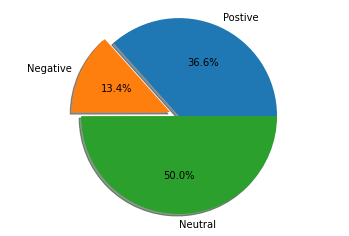


republic has tweeted about BJP 240 times.
--------------------------------



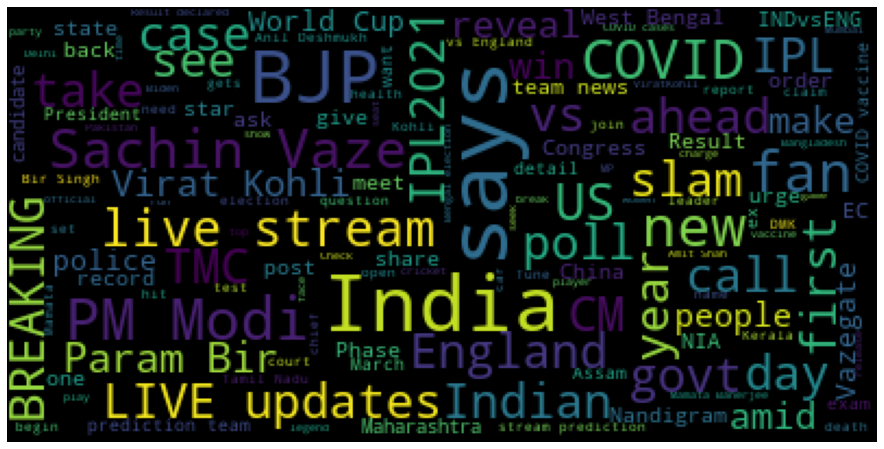

In [76]:

#Print the result
print(f"The most liked tweet is: {data['Tweets'][fav]}")
print(f"\nNumber of likes: {lik_max}")
print("------------------")
print()

#Print the most retweeted tweet
print(f"\nThe most retweeted tweet is: {data['Tweets'][rt]}")
print(f"\nNumber of rt: {rt_max}")
print("------------------")
print()

data.isnull().any()
data.describe()
data['Tweets_Cln']=data.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()
data=data[data.Likes!=0]
data.head(5)


def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets_Cln']])
print(data.head(5))

positive=data.loc[data.sentiment==1,'Tweets'].count()
negative=data.loc[data.sentiment==-1,'Tweets'].count()
neutral=data.loc[data.sentiment==0,'Tweets'].count()

#Let's plot
labels='Postive', 'Negative', 'Neutral'
sizes=[positive, negative, neutral]
explode=(0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()


edu_count = data.Tweets[data.Tweets.str.contains('BJP', flags=re.IGNORECASE)].count() 
print(f"\n{screen_name} has tweeted about BJP {edu_count} times.")
print("--------------------------------")
print()
data.Tweets[data.Tweets.str.contains('BJP', flags=re.IGNORECASE)]


stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "now", "go", "talk", "many", "Dear", "hello", "watch"])
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords, background_color="black").generate(data['Tweets_Cln'].str.cat())
plt.figure(figsize=[16,8])
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()